In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
# !pip install pdfplumber
import pdfplumber

movie_data = pd.read_csv("IMDB-Movie-Data.csv")
movie_data = movie_data[pd.notnull(movie_data['Revenue (Millions)'])].reset_index()
movie_data.drop(columns=['index'], inplace = True)
change_types = ['Rank', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']
for i in change_types:
    movie_data[[i]] = movie_data[[i]].apply(pd.to_numeric)
movie_data['Genre'] = movie_data['Genre'].apply(lambda x: x.split(','))
movie_data['Actors'] = movie_data['Actors'].apply(lambda x: re.split(',\s?', x))
# movie_data['Actors'] = movie_data['Actors'].apply(lambda x: x.split(/,\s?/))
movie_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"[Adventure, Mystery, Sci-Fi]","Following clues to the origin of mankind, a te...",Ridley Scott,"[Noomi Rapace, Logan Marshall-Green, Michael F...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"[Horror, Thriller]",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"[James McAvoy, Anya Taylor-Joy, Haley Lu Richa...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"[Animation, Comedy, Family]","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"[Matthew McConaughey, Reese Witherspoon, Seth ...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"[Action, Adventure, Fantasy]",A secret government agency recruits some of th...,David Ayer,"[Will Smith, Jared Leto, Margot Robbie, Viola ...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
867,994,Resident Evil: Afterlife,"[Action, Adventure, Horror]",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"[Milla Jovovich, Ali Larter, Wentworth Miller,...",2010,97,5.9,140900,60.13,37.0
868,995,Project X,[Comedy],3 high school seniors throw a birthday party t...,Nima Nourizadeh,"[Thomas Mann, Oliver Cooper, Jonathan Daniel B...",2012,88,6.7,164088,54.72,48.0
869,997,Hostel: Part II,[Horror],Three American college students studying abroa...,Eli Roth,"[Lauren German, Heather Matarazzo, Bijou Phill...",2007,94,5.5,73152,17.54,46.0
870,998,Step Up 2: The Streets,"[Drama, Music, Romance]",Romantic sparks occur between two dance studen...,Jon M. Chu,"[Robert Hoffman, Briana Evigan, Cassie Ventura...",2008,98,6.2,70699,58.01,50.0


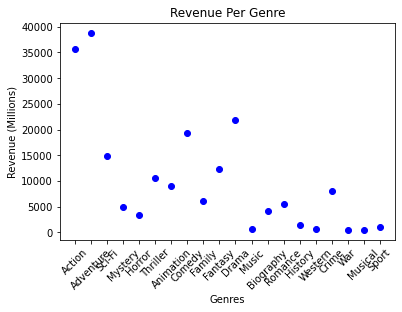

In [2]:
'''
Gets each genre and maps how much each genre made (allows multiple overlaps).
'''

genre_list = {}
for i in range(len(movie_data['Genre'])):
    for j in movie_data.loc[i,'Genre']:
        if j in genre_list:
            genre_list[j] = genre_list[j] + movie_data.loc[i,'Revenue (Millions)']
        else:
            genre_list[j] = movie_data.loc[i,'Revenue (Millions)']
for i in genre_list:
    plt.plot(i,genre_list[i], 'o', c='b')
plt.title('Revenue Per Genre')
plt.xlabel('Genres')
plt.ylabel('Revenue (Millions)')
plt.xticks(rotation = 45)
plt.show()

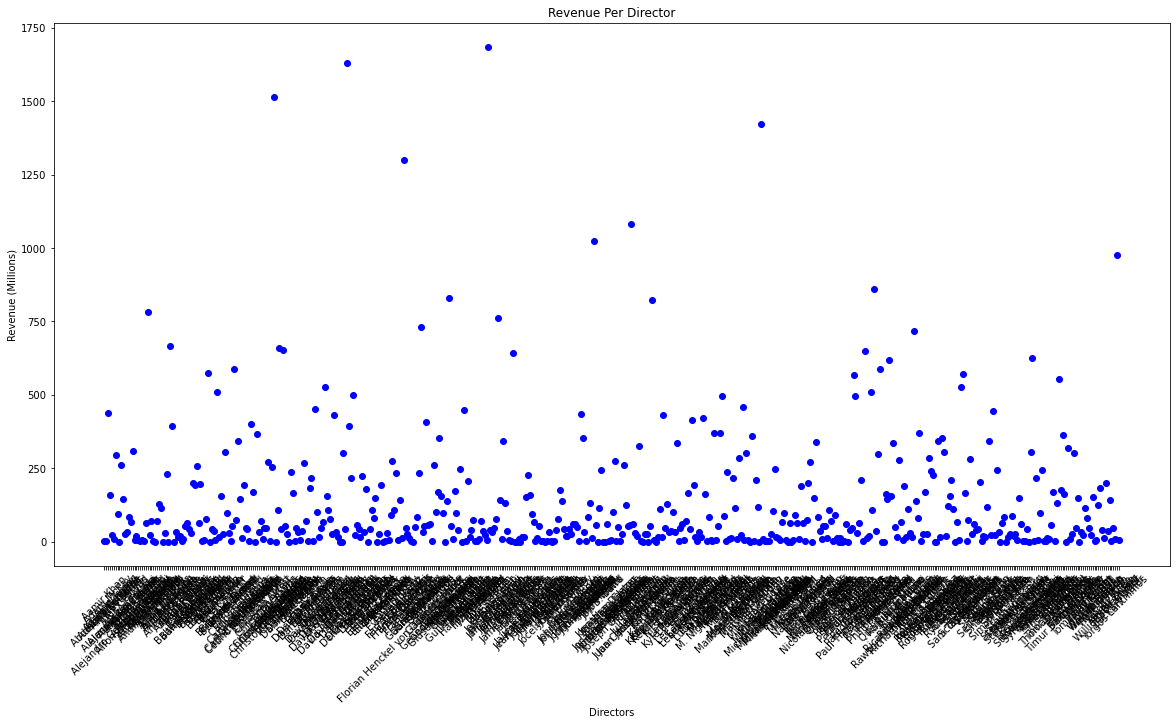

In [3]:
'''
Rough plot. Takes some time to actually display the scatterplot. 
Labels are a mess but it works. Should be 540 unique values and points
'''

directors = list(np.unique(movie_data['Director']))
plt.figure(figsize = (20, 10))
for i in directors:
    temp_data = movie_data[movie_data['Director'] == i]
    plt.plot(i,sum(temp_data['Revenue (Millions)']), 'o', c='b')
plt.title('Revenue Per Director')
plt.xlabel('Directors')
plt.ylabel('Revenue (Millions)')
plt.xticks(rotation = 45)
plt.show()

In [4]:
'''
Read datasets in changed points to actual numbers to make it easier to use
'''

actor_data = pd.read_csv("imdb_actors.csv", encoding='latin-1')
actress_data = pd.read_csv("imdb_actresses.csv", encoding='latin-1')
director_data = pd.read_csv("imdb_directors.csv", encoding='latin-1')

def to_num(lst):
    ret = []
    for i in range(len(lst)):
        x = re.search("(\d+)[^\d]*", lst[i])
        ret.append(int(x.group(1)))
    return ret

actor_data['Description'] = to_num(actor_data['Description'])
actor_data.rename(columns={"Description": "Points"}, inplace = True)
actor_data = actor_data.filter(['Points', 'Name'])

actress_data['Description'] = to_num(actress_data['Description'])
actress_data.rename(columns={"Description": "Points"}, inplace = True)
actress_data = actress_data.filter(['Points', 'Name'])

imdb_cast_key = pd.concat([actor_data, actress_data])
imdb_cast_key = imdb_cast_key.sort_values('Points', ascending = False).reset_index(drop=True)

director_data['Description'] = to_num(director_data['Description'])
director_data.rename(columns={"Description": "Points"}, inplace = True)
imdb_director_key = director_data.filter(['Points', 'Name'])

imdb_cast_key

,Points,Name
0,167820,Morgan Freeman
1,160473,Brad Pitt
2,157865,Leonardo DiCaprio
3,151313,Robert De Niro
4,140716,Matt Damon
...,...,...
1491,504,Raf Vallone
1492,502,Nadja Uhl
1493,502,Jan Josef Liefers
1494,502,Johanna Wokalek


In [5]:
def pdf_to_df(file):
    pdfdump = ""
    with pdfplumber.open(file) as pdf:
        for page in range(0, 6):
            pdfdump += pdf.pages[page].extract_text()
            pdfdump += "\n"
            
    key = {"Name":[], "Rank":[], "Fame(%)":[], "Popularity(%)":[]}
    for line in pdfdump.splitlines():
            match = re.search("(\d+)\s(.*)\s(\d+)%\s(\d+)%",line)
            if match:
                key["Name"].append(match.group(2))
                key["Rank"].append(match.group(1))
                key["Fame(%)"].append(match.group(3))
                key["Popularity(%)"].append(match.group(4))

    return pd.DataFrame(key)

In [6]:
yga_cast_key = pdf_to_df('yga_cast.pdf')
yga_cast_key

,Name,Rank,Fame(%),Popularity(%)
0,Robin Williams,1,96,84
1,Betty White,2,95,82
2,Denzel Washington,3,97,82
3,Morgan Freeman,4,96,80
4,Harrison Ford,5,96,77
...,...,...,...,...
1456,Janet McTeer,1471,26,13
1457,Niv Sultan,1472,26,13
1458,Adriana Barraza,1473,30,13
1459,Aleksey Serebryakov,1474,27,12


In [7]:
yga_director_key = pdf_to_df('yga_directors.pdf')
yga_director_key

,Name,Rank,Fame(%),Popularity(%)
0,Steven Spielberg,1,92,70
1,Alfred Hitchcock,2,89,70
2,Walt Disney,3,95,70
3,Ron Howard,4,84,66
4,George Lucas,5,88,64
...,...,...,...,...
136,David S. Goyer,138,26,12
137,Courtney Solomon,139,27,12
138,Doug Liman,140,24,11
139,Andy Tennant,141,30,11


In [8]:
'''
Address that there are 1492 actors/actress that dont have point associated
https://today.yougov.com/ratings/entertainment/popularity/all-time-actors-actresses/all
'''
def avg_cast(x, key_data, label):
    cast_lst = x['Actors']
    sum = 0
    cast_count = 0
    for cast_mem in cast_lst:
        if not key_data[key_data['Name'] == cast_mem].empty:
            pts = int(key_data.loc[key_data['Name'] == cast_mem, label].iloc[0])
            sum += pts
            cast_count += 1
        else:
            missing_cast.add(cast_mem)
    if cast_count:
        return (sum/cast_count)
    else:
        return 0
        
            

missing_cast = set()
movie_data['imdb_avg_cast_pts'] = movie_data.apply(lambda x: avg_cast(x, imdb_cast_key, "Points"), axis = 1)
print("# of IMDB Missing Cast Members: ", len(missing_cast))            
            
missing_cast = set()
movie_data['yga_avg_cast_rank'] = movie_data.apply(lambda x: avg_cast(x, yga_cast_key, "Rank"), axis = 1)
print("# of YGA Missing Cast Members: ", len(missing_cast))

# of IMDB Missing Cast Members:  1104
# of YGA Missing Cast Members:  1081


In [9]:
def avg_directors(x, key_data, label):
    if not key_data[key_data['Name'] == x['Director']].empty:
        return int(key_data.loc[key_data['Name'] == x['Director'], label].iloc[0])
    else:
        missing_directors.add(x['Director'])
        return 0
        
            
missing_directors = set()
movie_data['imdb_avg_director_pts'] = movie_data.apply(lambda x: avg_directors(x, imdb_director_key, "Points"), axis = 1)
print("# of IMDB Missing Directors: ", len(missing_directors))
            
missing_directors = set()
movie_data['yga_avg_director_rank'] = movie_data.apply(lambda x: avg_directors(x, yga_director_key, "Rank"), axis = 1)
print("# of YGA Missing Directors: ", len(missing_directors))

# of IMDB Missing Directors:  283
# of YGA Missing Directors:  478


In [10]:
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdb_avg_cast_pts,yga_avg_cast_rank,imdb_avg_director_pts,yga_avg_director_rank
count,872.000000,872.000000,872.000000,872.000000,8.720000e+02,872.000000,838.000000,872.000000,872.000000,872.000000,872.000000
mean,492.735092,2012.478211,114.783257,6.814335,1.909701e+05,82.956376,59.575179,24428.169820,547.682531,9373.274083,11.845183
std,288.134843,3.183552,18.633144,0.881674,1.921325e+05,103.253540,16.952416,21691.007201,361.204629,20682.606363,30.565510
min,1.000000,2006.000000,66.000000,1.900000,1.780000e+02,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,243.750000,2010.000000,101.000000,6.300000,6.062750e+04,13.270000,47.000000,8845.937500,266.875000,0.000000,0.000000
50%,488.500000,2013.000000,112.000000,6.900000,1.346540e+05,47.985000,60.000000,20628.625000,537.833333,1691.000000,0.000000
75%,739.250000,2015.000000,125.000000,7.500000,2.678330e+05,113.715000,72.000000,33895.916667,807.000000,8991.250000,0.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000,160473.000000,1457.000000,143174.000000,142.000000
